In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
# test different encodings to solve utf issues
years = range(2011, 2024)
encodings = ['latin1', 'iso-8859-1', 'windows-1252', 'utf-16']

dataframes = {}

successful_encodings = {}

for year in years:
    file_name = f"{year}_survey_results_public.csv"
    data_loaded = False
    
    for enc in encodings:
        try:
            df = pd.read_csv(file_name, encoding=enc)
            dataframes[year] = df
            successful_encodings[year] = enc
            print(f"Success with {enc} for {year}!")
            data_loaded = True
            break
        except UnicodeDecodeError as e:
            print(f"Failed with {enc} for {year}: {e}")

    if not data_loaded:
        print(f"No successful encoding found for {year}. Check file for issues or try additional encodings.")

Success with latin1 for 2011!
Success with latin1 for 2012!
Success with latin1 for 2013!
Success with latin1 for 2014!


C:\Users\Admin\AppData\Local\Temp\ipykernel_8932\2526416215.py:15: DtypeWarning: Columns (46,48,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name, encoding=enc)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8932\2526416215.py:15: DtypeWarning: Columns (5,108,121,196,197,198) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name, encoding=enc)


Success with latin1 for 2015!
Success with latin1 for 2016!
Success with latin1 for 2017!


C:\Users\Admin\AppData\Local\Temp\ipykernel_8932\2526416215.py:15: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name, encoding=enc)


Success with latin1 for 2018!
Success with latin1 for 2019!
Success with latin1 for 2020!
Success with latin1 for 2021!
Success with latin1 for 2022!
Success with latin1 for 2023!


In [3]:
# column names after manually inspecting csv file
# 2021, 2022, 2023
# WebframeHaveWorkedWith,
# WebframeWantToWorkWith
# 2020
# WebframeDesireNextYear,
# WebframeWorkedWith
# 2019
# WebFrameDesireNextYear,
# WebFrameWorkedWith
# 2018
# FrameworkWorkedWith,FrameworkDesireNextYear
# 2017
# HaveWorkedFramework,WantWorkFramework

In [4]:
display(dataframes[2022])

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Masterâs degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I donât code outside of work,"Bachelorâs degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelorâs degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelorâs degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73264,73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Masterâs degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73265,73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelorâs degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN
73266,73267,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelorâs degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training,NaN,NaN,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN


In [5]:
# cleaning of data
name_mapping = {
    'ASP.NET CORE': 'ASP.NET Core',
    'ASP.NET CORE ': 'ASP.NET Core',
    'ASP.NET Core': 'ASP.NET Core',
    'ASP.NET Core ': 'ASP.NET Core',
    '.NET Core': 'ASP.NET Core',
    'Angular': 'Angular',
    'Angular.js': 'Angular.js',
    'AngularJS': 'Angular.js',
    'Node.js': 'Node.js',
    'NodeJS': 'Node.js',
    'Blazor': 'Blazor',
    'React.js': 'React',
    'React': 'React'
}

columns_per_year = {
    2023: ('WebframeHaveWorkedWith', 'WebframeWantToWorkWith'),
    2022: ('WebframeHaveWorkedWith', 'WebframeWantToWorkWith'),
    2021: ('WebframeHaveWorkedWith', 'WebframeWantToWorkWith'),
    2020: ('WebframeWorkedWith', 'WebframeDesireNextYear'),
    2019: ('WebFrameWorkedWith', 'WebFrameDesireNextYear'),
    2018: ('FrameworkWorkedWith', 'FrameworkDesireNextYear'),
    2017: ('HaveWorkedFramework', 'WantWorkFramework')
}

dataframescount = {}
# dataframes from years 2016 and below dont have questions about frameworks

In [6]:
def transform_dataframe(df, year, worked_with_col, want_to_work_with_col):
    df = df.reset_index(drop=True)

    exploded_have_worked_with = df[worked_with_col].fillna('').str.split('; ?', expand=False).explode().reset_index()
    exploded_want_to_work_with = df[want_to_work_with_col].fillna('').str.split('; ?', expand=False).explode().reset_index()

    exploded_have_worked_with.columns = ['original_index', worked_with_col]
    exploded_want_to_work_with.columns = ['original_index', want_to_work_with_col]

    exploded_have_worked_field = exploded_have_worked_with[exploded_have_worked_with[worked_with_col] != '']
    exploded_want_to_work_field = exploded_want_to_work_with[exploded_want_to_work_with[want_to_work_with_col] != '']

    worked_with_counts = exploded_have_worked_field[worked_with_col].value_counts().reset_index()
    worked_with_counts.columns = ['framework', 'count_worked_with']
    
    want_to_work_with_counts = exploded_want_to_work_field[want_to_work_with_col].value_counts().reset_index()
    want_to_work_with_counts.columns = ['framework', 'count_want_to_work_with']

    merged_df = pd.merge(worked_with_counts, want_to_work_with_counts, on='framework', how='outer').fillna(0)
    
    merged_df['framework'] = merged_df['framework'].replace(name_mapping)
    
    final_df = merged_df.groupby('framework').agg({
        'count_worked_with': 'sum',
        'count_want_to_work_with': 'sum'
    }).reset_index()

    final_df['year'] = year
    
    return final_df

for year, (worked_col, want_col) in columns_per_year.items():
    dataframescount[year] = transform_dataframe(dataframes[year], year, worked_col, want_col)
    display(dataframescount[year])

,framework,count_worked_with,count_want_to_work_with,year
0,ASP.NET,9185,4407,2023
1,ASP.NET Core,11896,10060,2023
2,Angular,12537,9359,2023
3,Angular.js,5176,2646,2023
4,Blazor,3501,4553,2023
5,CodeIgniter,1238,456,2023
6,Deno,1697,4836,2023
7,Django,8238,6945,2023
8,Drupal,1343,530,2023
9,Elm,580,1020,2023


,framework,count_worked_with,count_want_to_work_with,year
0,ASP.NET,8139,3848,2022
1,ASP.NET Core,10155,8894,2022
2,Angular,11138,8402,2022
3,Angular.js,4912,2773,2022
4,Blazor,2438,3880,2022
5,Deno,925,3717,2022
6,Django,8002,7200,2022
7,Drupal,1211,600,2022
8,Express,12557,9333,2022
9,FastAPI,3289,4571,2022


,framework,count_worked_with,count_want_to_work_with,year
0,ASP.NET,9918,4488,2021
1,ASP.NET Core,11404,10454,2021
2,Angular,14471,11533,2021
3,Angular.js,7242,4293,2021
4,Django,9446,9112,2021
5,Drupal,1508,653,2021
6,Express,15010,11885,2021
7,FastAPI,2447,3989,2021
8,Flask,10174,7594,2021
9,Gatsby,2501,2830,2021


,framework,count_worked_with,count_want_to_work_with,year
0,ASP.NET,9258,4818,2020
1,ASP.NET Core,8082,9018,2020
2,Angular,10617,10762,2020
3,Angular.js,6826,5601,2020
4,Django,6014,8237,2020
5,Drupal,1369,889,2020
6,Express,8961,8128,2020
7,Flask,6005,6097,2020
8,Gatsby,1703,2998,2020
9,Laravel,4680,4260,2020


,framework,count_worked_with,count_want_to_work_with,year
0,ASP.NET,16699,13495,2019
1,Angular/Angular.js,19532,19622,2019
2,Django,8249,11358,2019
3,Drupal,2195,1538,2019
4,Express,12522,12092,2019
5,Flask,7694,8163,2019
6,Laravel,6679,6536,2019
7,Other(s):,5257,4968,2019
8,React,19877,29531,2019
9,Ruby on Rails,5225,6632,2019


,framework,count_worked_with,count_want_to_work_with,year
0,ASP.NET Core,14026,15300,2018
1,Angular,19023,18936,2018
2,Cordova,4369,3692,2018
3,Django,6723,8774,2018
4,Hadoop,2447,6243,2018
5,Node.js,25598,28112,2018
6,React,14337,23736,2018
7,Spark,2475,5314,2018
8,Spring,9079,8063,2018
9,TensorFlow,4026,14600,2018


,framework,count_worked_with,count_want_to_work_with,year
0,ASP.NET Core,6763,8008,2017
1,Angular.js,8962,10080,2017
2,Cordova,2232,2164,2017
3,Firebase,1979,2946,2017
4,Hadoop,1148,3404,2017
5,Node.js,9522,12039,2017
6,React,3953,8920,2017
7,Spark,953,2538,2017
8,Xamarin,1675,3799,2017


In [7]:
# make one big df
dataframes_list = []

for year in range(2017, 2024):
    if year in dataframescount:
        dataframes_list.append(dataframescount[year])

all_data_df = pd.concat(dataframes_list, ignore_index=True)

In [8]:
display(all_data_df)

,framework,count_worked_with,count_want_to_work_with,year
0,ASP.NET Core,6763,8008,2017
1,Angular.js,8962,10080,2017
2,Cordova,2232,2164,2017
3,Firebase,1979,2946,2017
4,Hadoop,1148,3404,2017
...,...,...,...,...
122,Svelte,4753,9803,2023
123,Symfony,2301,1591,2023
124,Vue.js,11758,12001,2023
125,WordPress,9604,3955,2023


In [9]:
# get proportions of angular / angular.js in 2020, so we can split the 'Angular/angular.js' answer from 2019 with the same proportions.
angular_worked_2020 = all_data_df[(all_data_df['year'] == 2020) & (all_data_df['framework'] == 'Angular')]['count_worked_with'].sum()
angular_want_2020 = all_data_df[(all_data_df['year'] == 2020) & (all_data_df['framework'] == 'Angular')]['count_want_to_work_with'].sum()
angularjs_worked_2020 = all_data_df[(all_data_df['year'] == 2020) & (all_data_df['framework'] == 'Angular.js')]['count_worked_with'].sum()
angularjs_want_2020 = all_data_df[(all_data_df['year'] == 2020) & (all_data_df['framework'] == 'Angular.js')]['count_want_to_work_with'].sum()

total_worked_2020 = angular_worked_2020 + angularjs_worked_2020
total_want_2020 = angular_want_2020 + angularjs_want_2020

prop_angularjs_worked_2020 = angularjs_worked_2020 / total_worked_2020
prop_angular_worked_2020 = angular_worked_2020 / total_worked_2020
prop_angularjs_want_2020 = angularjs_want_2020 / total_want_2020
prop_angular_want_2020 = angular_want_2020 / total_want_2020

proportions_2020 = {
    'prop_angularjs_worked_2020': prop_angularjs_worked_2020,
    'prop_angular_worked_2020': prop_angular_worked_2020,
    'prop_angularjs_want_2020': prop_angularjs_want_2020,
    'prop_angular_want_2020': prop_angular_want_2020
}
print(proportions_2020)

{'prop_angularjs_worked_2020': 0.39133176632460015, 'prop_angular_worked_2020': 0.6086682336753999, 'prop_angularjs_want_2020': 0.3422966448695227, 'prop_angular_want_2020': 0.6577033551304773}


In [10]:
# fix proportion split in 2019
angular_2019 = all_data_df[(all_data_df['year'] == 2019) & (all_data_df['framework'] == 'Angular/Angular.js')]
display(angular_2019)

all_data_df = all_data_df[~((all_data_df['year'] == 2019) & (all_data_df['framework'] == 'Angular/Angular.js'))]

worked_with_angular_2019 = round(angular_2019['count_worked_with'] * proportions_2020['prop_angular_worked_2020'], 0)
worked_with_angularjs_2019 = round(angular_2019['count_worked_with'] * proportions_2020['prop_angularjs_worked_2020'], 0)
want_to_work_with_angular_2019 = round(angular_2019['count_want_to_work_with'] * proportions_2020['prop_angular_want_2020'], 0)
want_to_work_with_angularjs_2019 = round(angular_2019['count_want_to_work_with'] * proportions_2020['prop_angularjs_want_2020'], 0)

new_rows = pd.DataFrame({
    'framework': ['Angular', 'Angular.js'],
    'count_worked_with': [worked_with_angular_2019.values[0], worked_with_angularjs_2019.values[0]],
    'count_want_to_work_with': [want_to_work_with_angular_2019.values[0], want_to_work_with_angularjs_2019.values[0]],
    'year': [2019, 2019]
})

all_data_df = pd.concat([all_data_df, new_rows], ignore_index=True)

all_data_df[all_data_df['year'] == 2019][['framework', 'count_worked_with', 'count_want_to_work_with']]  # Displaying the relevant section for verification

,framework,count_worked_with,count_want_to_work_with,year
22,Angular/Angular.js,19532,19622,2019


,framework,count_worked_with,count_want_to_work_with
21,ASP.NET,16699.0,13495.0
22,Django,8249.0,11358.0
23,Drupal,2195.0,1538.0
24,Express,12522.0,12092.0
25,Flask,7694.0,8163.0
26,Laravel,6679.0,6536.0
27,Other(s):,5257.0,4968.0
28,React,19877.0,29531.0
29,Ruby on Rails,5225.0,6632.0
30,Spring,10298.0,9846.0


In [11]:
df_long = all_data_df.melt(id_vars=['framework', 'year'], var_name='metric', value_name='count')

In [12]:
display(df_long)

,framework,year,metric,count
0,ASP.NET Core,2017,count_worked_with,6763.0
1,Angular.js,2017,count_worked_with,8962.0
2,Cordova,2017,count_worked_with,2232.0
3,Firebase,2017,count_worked_with,1979.0
4,Hadoop,2017,count_worked_with,1148.0
...,...,...,...,...
251,Vue.js,2023,count_want_to_work_with,12001.0
252,WordPress,2023,count_want_to_work_with,3955.0
253,jQuery,2023,count_want_to_work_with,5838.0
254,Angular,2019,count_want_to_work_with,12905.0


In [13]:
# lineair regression predict
import pandas as web_md
from sklearn.linear_model import LinearRegression

def predict_counts(framework, metric, df_long):
    temp_df = df_long[(df_long['framework'] == framework) & (df_long['metric'] == metric)]
    
    if temp_df.empty:
        return None
    
    X = temp_df[['year']]
    y = temp_df['count']
    
    model = LinearRegression()
    model.fit(X, y)

    pred_df = pd.DataFrame({'year': [2024]})
    
    predicted_count = model.predict(pred_df)
    return predicted_count[0]

predicted_data = []
for framework in df_long['framework'].unique():
    for metric in ['count_worked_with', 'count_want_to_work_with']:
        predicted_count = predict_counts(framework, metric, df_long)
        predicted_data.append({'framework': framework, 'metric': metric, 'year': 2024, 'predicted_count': predicted_count})

predicted_df = pd.DataFrame(predicted_data)
display(predicted_df)

,framework,metric,year,predicted_count
0,ASP.NET Core,count_worked_with,2024,11626.714286
1,ASP.NET Core,count_want_to_work_with,2024,9361.714286
2,Angular.js,count_worked_with,2024,4354.328571
3,Angular.js,count_want_to_work_with,2024,655.714286
4,Cordova,count_worked_with,2024,17191.000000
...,...,...,...,...
81,Solid.js,count_want_to_work_with,2024,3448.000000
82,Spring Boot,count_worked_with,2024,8583.000000
83,Spring Boot,count_want_to_work_with,2024,6587.000000
84,WordPress,count_worked_with,2024,9604.000000


In [14]:
all_data_df = pd.concat([df_long, predicted_df], ignore_index=True)

In [15]:
display(all_data_df)

,framework,year,metric,count,predicted_count
0,ASP.NET Core,2017,count_worked_with,6763.0,NaN
1,Angular.js,2017,count_worked_with,8962.0,NaN
2,Cordova,2017,count_worked_with,2232.0,NaN
3,Firebase,2017,count_worked_with,1979.0,NaN
4,Hadoop,2017,count_worked_with,1148.0,NaN
...,...,...,...,...,...
337,Solid.js,2024,count_want_to_work_with,NaN,3448.0
338,Spring Boot,2024,count_worked_with,NaN,8583.0
339,Spring Boot,2024,count_want_to_work_with,NaN,6587.0
340,WordPress,2024,count_worked_with,NaN,9604.0


In [16]:
# combining predicted count with original count column
all_data_df = all_data_df.sort_values(by=['framework', 'year'])
all_data_df = all_data_df.reset_index(drop=True)
all_data_df['count'] = all_data_df['count'].fillna(all_data_df.pop('predicted_count'))

In [17]:
display(all_data_df)

,framework,year,metric,count
0,ASP.NET,2019,count_worked_with,16699.0
1,ASP.NET,2019,count_want_to_work_with,13495.0
2,ASP.NET,2020,count_worked_with,9258.0
3,ASP.NET,2020,count_want_to_work_with,4818.0
4,ASP.NET,2021,count_worked_with,9918.0
...,...,...,...,...
337,jQuery,2022,count_want_to_work_with,5937.0
338,jQuery,2023,count_worked_with,15784.0
339,jQuery,2023,count_want_to_work_with,5838.0
340,jQuery,2024,count_worked_with,10542.8


In [18]:
all_data_df = all_data_df[all_data_df['framework'] != 'Other(s):']

In [19]:
df_worked_with = all_data_df[all_data_df['metric'] == 'count_worked_with']
df_want_to_work_with = all_data_df[all_data_df['metric'] == 'count_want_to_work_with']

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

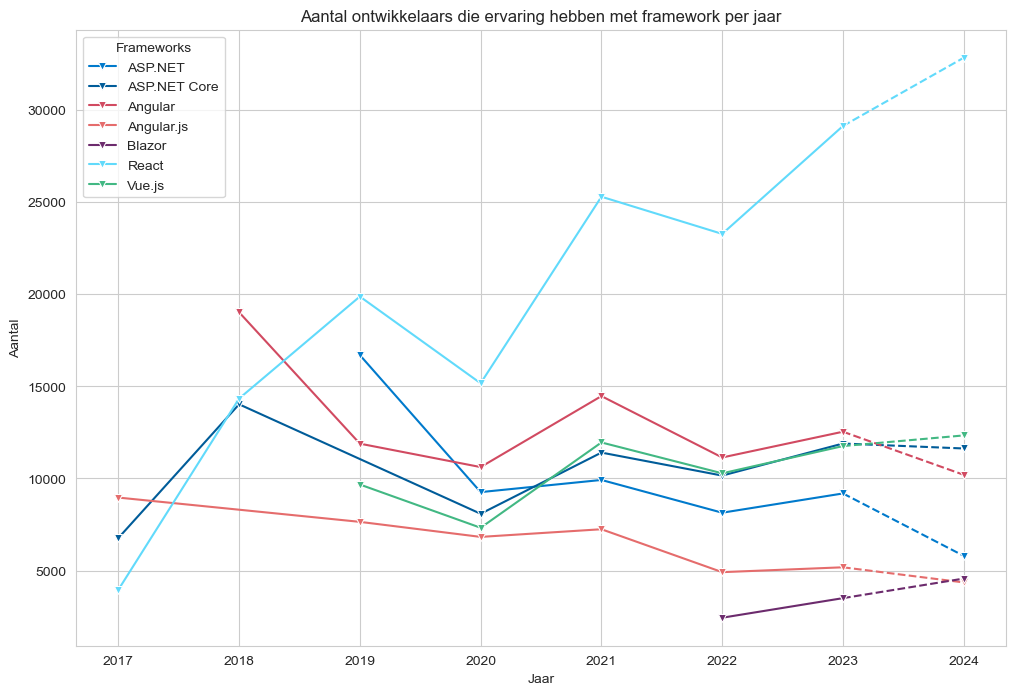

In [20]:
sns.set_style("whitegrid")

color_mapping = {
    'ASP.NET': '#007ACC',
    'ASP.NET Core': '#005C99',
    'Angular': '#d14a61',
    'Angular.js': '#E56C6C',
    'Blazor': '#6c2b6d',
    'React': '#61DAFB',
    'Vue.js': '#42B883'
}

selected_frameworks = ['ASP.NET', 'ASP.NET Core', 'Angular', 'Angular.js', 'Blazor', 'React', 'Vue.js']
filtered_df = df_worked_with[df_worked_with['framework'].isin(selected_frameworks)]

plt.figure(figsize=(12, 8))

for framework in selected_frameworks:
    framework_data = filtered_df[filtered_df['framework'] == framework]
    if len(framework_data) > 1:
        # Use the color from the custom dictionary
        sns.lineplot(data=framework_data[:-1], x='year', y='count', label=framework,
                     marker='v', color=color_mapping[framework])
        sns.lineplot(data=framework_data[-2:], x='year', y='count',
                     marker='v', linestyle='--', color=color_mapping[framework], legend=None)

plt.title('Aantal ontwikkelaars die ervaring hebben met framework per jaar')
plt.legend(title='Frameworks')
plt.xlabel('Jaar')
plt.ylabel('Aantal')
plt.grid(True)
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

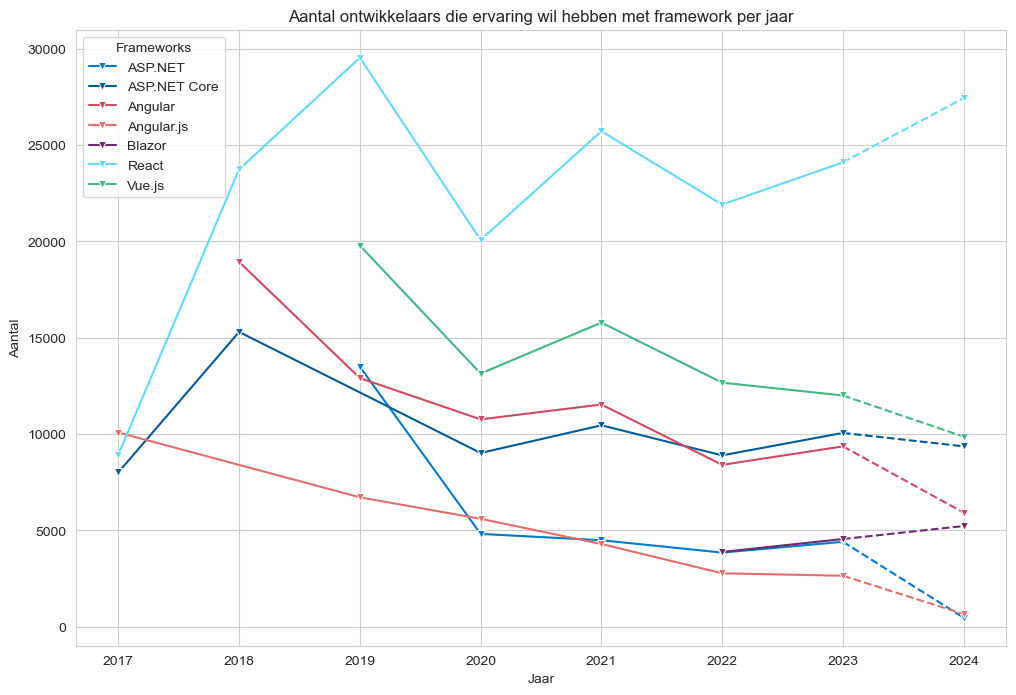

In [21]:
sns.set_style("whitegrid")

color_mapping = {
    'ASP.NET': '#007ACC',
    'ASP.NET Core': '#005C99',
    'Angular': '#d14a61',
    'Angular.js': '#E56C6C',
    'Blazor': '#6c2b6d',
    'React': '#61DAFB',
    'Vue.js': '#42B883'
}

selected_frameworks = ['ASP.NET', 'ASP.NET Core', 'Angular', 'Angular.js', 'Blazor', 'React', 'Vue.js']
filtered_df = df_want_to_work_with[df_want_to_work_with['framework'].isin(selected_frameworks)]

plt.figure(figsize=(12, 8))

for framework in selected_frameworks:
    framework_data = filtered_df[filtered_df['framework'] == framework]
    if len(framework_data) > 1:
        sns.lineplot(data=framework_data[:-1], x='year', y='count', label=framework,
                     marker='v', color=color_mapping[framework])
        sns.lineplot(data=framework_data[-2:], x='year', y='count',
                     marker='v', linestyle='--', color=color_mapping[framework], legend=None)

plt.title('Aantal ontwikkelaars die ervaring wil hebben met framework per jaar')
plt.legend(title='Frameworks')
plt.xlabel('Jaar')
plt.ylabel('Aantal')
plt.grid(True)
plt.show()